<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.449016,31.394226,-4.919066,65.924176,69.938385,-4.014209
1,0.0,1.0,66.795996,31.543441,4.228517,112.567954,107.482641,5.085313
2,0.0,2.0,51.310653,69.407046,6.401463,137.119163,131.095623,6.023539
3,0.0,3.0,42.495464,34.407855,6.433551,93.336870,86.113223,7.223647
4,0.0,4.0,32.028913,54.638183,5.632865,102.299961,96.534172,5.765789
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.943173,85.237863,2.426299,149.607334,146.412301,3.195034
59996,999.0,56.0,81.883884,44.782282,0.799015,137.465181,137.603608,-0.138428
59997,999.0,57.0,64.465036,44.342995,2.052879,120.860911,119.398841,1.462070
59998,999.0,58.0,77.840540,46.287280,-2.310062,131.817758,134.941503,-3.123745


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.449016,31.394226,-4.919066,65.924176,69.938385,-4.014209
1,0.0,1.0,66.795996,31.543441,4.228517,112.567954,107.482641,5.085313
2,0.0,2.0,51.310653,69.407046,6.401463,137.119163,131.095623,6.023539
3,0.0,3.0,42.495464,34.407855,6.433551,93.336870,86.113223,7.223647
4,0.0,4.0,32.028913,54.638183,5.632865,102.299961,96.534172,5.765789
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.943173,85.237863,2.426299,149.607334,146.412301,3.195034
59996,999.0,56.0,81.883884,44.782282,0.799015,137.465181,137.603608,-0.138428
59997,999.0,57.0,64.465036,44.342995,2.052879,120.860911,119.398841,1.462070
59998,999.0,58.0,77.840540,46.287280,-2.310062,131.817758,134.941503,-3.123745


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.449016  31.394226 -4.919066   65.924176   69.938385 -4.014209
      1.0    66.795996  31.543441  4.228517  112.567954  107.482641  5.085313
      2.0    51.310653  69.407046  6.401463  137.119163  131.095623  6.023539
      3.0    42.495464  34.407855  6.433551   93.336870   86.113223  7.223647
      4.0    32.028913  54.638183  5.632865  102.299961   96.534172  5.765789
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.943173  85.237863  2.426299  149.607334  146.412301  3.195034
      56.0   81.883884  44.782282  0.799015  137.465181  137.603608 -0.138428
      57.0   64.465036  44.342995  2.052879  120.860911  119.398841  1.462070
      58.0   77.840540  46.287280 -2.310062  131.817758  134.941503 -3.123745
      59.0   31.080478  65.765101 -3.418054  103.427526  106.172168 -2.744642

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.449016  31.394226 -4.919066   65.924176   69.938385 -4.014209
      1.0    66.795996  31.543441  4.228517  112.567954  107.482641  5.085313
      2.0    51.310653  69.407046  6.401463  137.119163  131.095623  6.023539
      3.0    42.495464  34.407855  6.433551   93.336870   86.113223  7.223647
      4.0    32.028913  54.638183  5.632865  102.299961   96.534172  5.765789
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.943173  85.237863  2.426299  149.607334  146.412301  3.195034
      56.0   81.883884  44.782282  0.799015  137.465181  137.603608 -0.138428
      57.0   64.465036  44.342995  2.052879  120.860911  119.398841  1.462070
      58.0   77.840540  46.287280 -2.310062  131.817758  134.941503 -3.123745
      59.0   31.080478  65.765101 -3.418054  103.427526  106.172168 -2.744642

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.449016,31.394226,-4.919066,65.924176,69.938385,-4.014209
1,0.0,1.0,66.795996,31.543441,4.228517,112.567954,107.482641,5.085313
2,0.0,2.0,51.310653,69.407046,6.401463,137.119163,131.095623,6.023539
3,0.0,3.0,42.495464,34.407855,6.433551,93.336870,86.113223,7.223647
4,0.0,4.0,32.028913,54.638183,5.632865,102.299961,96.534172,5.765789
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.943173,85.237863,2.426299,149.607334,146.412301,3.195034
59996,999.0,56.0,81.883884,44.782282,0.799015,137.465181,137.603608,-0.138428
59997,999.0,57.0,64.465036,44.342995,2.052879,120.860911,119.398841,1.462070
59998,999.0,58.0,77.840540,46.287280,-2.310062,131.817758,134.941503,-3.123745


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.449016  31.394226 -4.919066   65.924176   69.938385 -4.014209
      1.0    66.795996  31.543441  4.228517  112.567954  107.482641  5.085313
      2.0    51.310653  69.407046  6.401463  137.119163  131.095623  6.023539
      3.0    42.495464  34.407855  6.433551   93.336870   86.113223  7.223647
      4.0    32.028913  54.638183  5.632865  102.299961   96.534172  5.765789
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.943173  85.237863  2.426299  149.607334  146.412301  3.195034
      56.0   81.883884  44.782282  0.799015  137.465181  137.603608 -0.138428
      57.0   64.465036  44.342995  2.052879  120.860911  119.398841  1.462070
      58.0   77.840540  46.287280 -2.310062  131.817758  134.941503 -3.123745
      59.0   31.080478  65.765101 -3.418054  103.427526  106.172168 -2.744642

[60000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

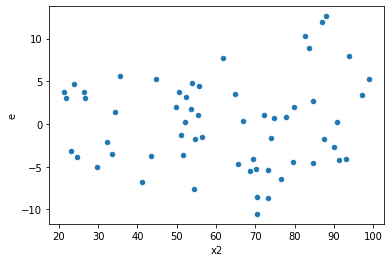

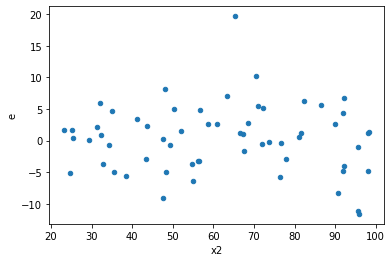

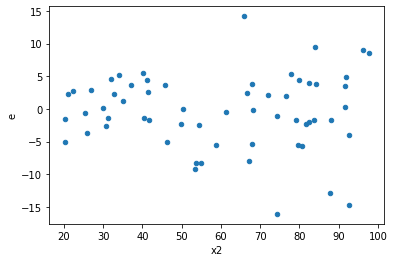

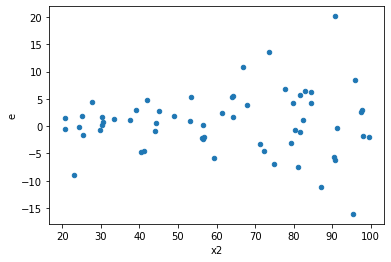

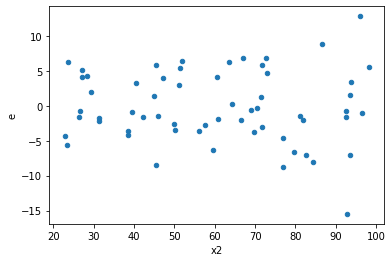

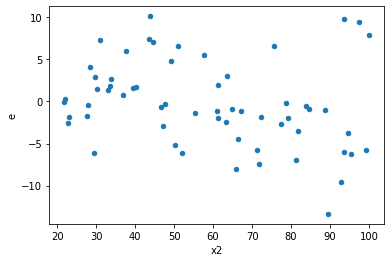

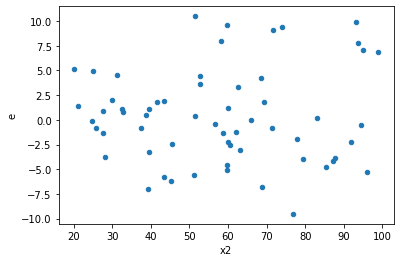

In [12]:
tablenew0 = table.loc[13.0]
tablenew1 = table.loc[27.0]
tablenew2 = table.loc[81.0]
tablenew3 = table.loc[101.0]
tablenew4 = table.loc[130.0]
tablenew5 = table.loc[136.0]
tablenew6 = table.loc[159.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,321.8141206191031,632.6767383583605,14.627914573595596,28.75803356174366,1.9659694768558404,0.1204140351545604,0.9397929824227198,0.0602070175772802,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,454.8711543138159,509.7841301971875,20.675961559718903,23.172005918053976,1.120722044830935,0.791625080848902,0.604187459575549,0.395812540424451,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,721.4573352386066,884.5372019897455,32.79351523811848,40.206236454079345,1.226042287999198,0.6368330014114121,0.681583499294294,0.31841650070570604,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,459.9435494970644,922.6824389733562,20.90652497713929,41.94011086242528,2.006077571872209,0.10991790549254521,0.9450410472537274,0.054958952746272605,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,272.11510256151143,606.9562812476989,12.36886829825052,27.588921874895405,2.230513027517452,0.06630575578297182,0.9668471221085141,0.03315287789148591,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,558.8261215068039,586.3184076610315,25.40118734121836,26.650836711865068,1.049196494394532,0.9113385964623566,0.5443307017688217,0.4556692982311783,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,323.3063475763675,598.5766133875221,14.695743071653068,27.208027881251006,1.8514223982136127,0.15639586986117515,0.9218020650694124,0.07819793493058758,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,581.7594276219407,636.5436199095568,26.44361034645185,28.933800904979854,1.0941698401202669,0.8347289781234162,0.5826355109382919,0.4173644890617081,Reject001=1 : Homoscedasticity
9.0,22.0,22.0,292.7558414207992,477.7759502607388,13.307083700945418,21.717088648215398,1.6319945929755053,0.2584009449561282,0.8707995275219359,0.1292004724780641,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,321.8141206191031,632.6767383583605,14.627914573595596,28.75803356174366,1.9659694768558404,0.1204140351545604,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,454.8711543138159,509.7841301971875,20.675961559718903,23.172005918053976,1.120722044830935,0.791625080848902,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,721.4573352386066,884.5372019897455,32.79351523811848,40.206236454079345,1.226042287999198,0.6368330014114121,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,459.9435494970644,922.6824389733562,20.90652497713929,41.94011086242528,2.006077571872209,0.10991790549254521,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,272.11510256151143,606.9562812476989,12.36886829825052,27.588921874895405,2.230513027517452,0.06630575578297182,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,558.8261215068039,586.3184076610315,25.40118734121836,26.650836711865068,1.049196494394532,0.9113385964623566,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,323.3063475763675,598.5766133875221,14.695743071653068,27.208027881251006,1.8514223982136127,0.15639586986117515,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,540.8525892542585,354.20623093041286,24.584208602466298,16.100283224109674,0.6549034579252019,0.3281469711822604,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,581.7594276219407,636.5436199095568,26.44361034645185,28.933800904979854,1.0941698401202669,0.8347289781234162,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      949
Reject001=0 : Heteroscedasticity     51
Name: Result_test, dtype: int64